# Actividad 7


In [2]:
#Importamos bibliotecas necesarias
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas.util.testing as tm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Ejercicio 1**

Defina las siguientes matrices:
<br><center>$A = \begin{bmatrix}1 & 3 \\ -1 & 7 \end{bmatrix}$
<br>$B = \begin{bmatrix}5 & 2 \\ 1 & 2 \end{bmatrix}$</center>
<br>y la matriz identidad:
<br><center>$I = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$</center>
<br>Calcule el resultado de 2$\text{*}$I + 3$\text{*}$A + A@B

In [3]:
#Definimos las matrices A, B, e I
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])
I = np.eye(2, dtype=int)

#Imprimimos las matrices
print('Matriz A:', A)
print('Matriz B:', B)
print('Matriz I:', I)

Matriz A: [[ 1  3]
 [-1  7]]
Matriz B: [[5 2]
 [1 2]]
Matriz I: [[1 0]
 [0 1]]


In [4]:
#Realizamos las operaciones de matrices
C = 2*I + 3*A + A@B
C

array([[13, 17],
       [-1, 35]])

**Ejercicio 2**
<br>Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M está dado en general por la ecuación: <br><center>$det(M - \lambda I)=0$</center>
<br>Para una matriz cuadrada M(2x2), el polinomio característico está dado en general por la ecuación:
<br><center>$P_2(\lambda) = det(M)-tr(M)\lambda + \lambda^2$</center>
<br>y para una matriz cuadrada M(3x3), el polinomio característico resulta ser
<br><center>$P_3(\lambda) = \frac{1}{6}[tr^3(M)+2tr(M^3)-3tr(M)tr(M^2)]-\frac{1}{2}[tr^2(M)-tr(M^2)]\lambda +tr(M)\lambda^2 - \lambda^3$</center>
<br>El teorema de Cayley-Hamilton nos dice que una matriz cuadrada M(2x2), satisface el polinomio característico:
<br><center>$P_2(M)=det(M)I-tr(M)M+M^2$</center>
<br>y en general cualquier matriz cuadrada M(nxn), satisface $P_n(M)$.
<br>Demuestre esto para cualquier matriz M(2x2), det(M)$\not=$0.

***Demostración***
<br>Tenemos la matriz: 
<br><center>$M = \begin{bmatrix}a & b \\ c & d \end{bmatrix}$</center>
<br>El determinante es: 
<br><center>$det(M)=ad-bc\not=0$</center>
<br>La traza es:
<br><center>$tr(M)=a+d$</center>
<br>Desarrollamos el polinomio característico:
<br><center>$P_2(M)=det(M)I-tr(M)M+M^2$
<br>$P_2(M)=(ad-bc)\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}-(a+d)\begin{bmatrix}a & b \\ c & d \end{bmatrix}+\begin{bmatrix}a & b \\ c & d \end{bmatrix}\begin{bmatrix}a & b \\ c & d \end{bmatrix}$
<br>$P_2(M)=\begin{bmatrix}ad-bc & 0 \\ 0 & ad-bc \end{bmatrix} - \begin{bmatrix}a^2+ad & ab+bd \\ ac+cd & ad+d^2 \end{bmatrix} + \begin{bmatrix}a^2+bc & ab+bd \\ ac+cd & bc+d^2 \end{bmatrix}$</center>
<br>Sumando obtenemos:
<br><center>$P_2=\begin{bmatrix}ad-bc-a^2-ad+a^2+bc & -ab-bd+ab+bd \\ -ac-cd+ac+cd & ad-bc-ad-d^2+bc+d^2 \end{bmatrix}=\begin{bmatrix}0 & 0 \\ 0 & 0 \end{bmatrix}$</center>
<br>Por lo que demostramos que el teorema es válido para cualquier matriz M(2x2) cuyo determinante es diferente a 0.

In [5]:
#Ahora mostramos con un ejemplo
M = np.array([[3,7],[2,4]])
detM = la.det(M)
trM = np.trace(M)
#Imprimimos la matriz, el determinante y la traza
print('Matriz: ', M)
print('Determinante: ', int(detM))
print('Traza: ', trM)

Matriz:  [[3 7]
 [2 4]]
Determinante:  -2
Traza:  7


In [6]:
#Calculamos el polinomio característico para la matriz de 2x2
P_2 = detM*I-trM*M+mpow(M,2)
print(P_2)

[[0. 0.]
 [0. 0.]]


**Ejercicio 3**

Resuelva el sistema de ecuaciones:
<center><br>$x-3y+z=1$
<br>$3x-4y+z=5$
<br>$2y-z=0$</center>
<br>de dos formas, utilizando el Método de Eliminación Gaussiana y la función scipy.linalg.solve()

*Eliminación Gaussiana*

In [7]:
#Definimos las funciones que se necesitan para la eliminación gaussiana
#Intercambio de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

#Multiplicación de un renglón por una constante.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

#Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [8]:
#Definimos la matriz del sistema de ecuaciones
A = np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
print(A)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [9]:
#Multiplicamos el primer renglón por -3 y se lo sumamos al segundo renglón
A1 = add_row(A,-3,1,0)
print(A1)

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [10]:
#Dividimos entre 5 el segundo renglón
A2 = scale_row(A1, 1/5, 1)
print(A2)

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   2.  -1.   0. ]]


In [11]:
#Multiplicamos por 3 el segundo renglón y se lo sumamos al primero
A3 = add_row(A2, 3, 0,1)
#Multiplicamos por -2 el segudo renglón y se lo sumamos al tercero
A4 = add_row(A3, -2, 2, 1)
print(A4)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [12]:
#Multiplicamos por -5 el tercer renglón
A5 = scale_row(A4, -5, 2)
print(A5)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.   1.   4. ]]


In [13]:
#Multiplicamos el tercer renglón por 0.4 y se lo sumamos al segundo
A6 = add_row(A5, 0.4, 1, 2)
#Multiplicamos el tercer renglón por 0.2 y se lo sumamos al primero
A7 = add_row(A6, 0.2, 0, 2)
print(A7)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


Tenemos entonces que
<center><br>$x=3$
<br>$y=2$ 
<br>$z=4$</center>

*Función scipy.linalg.solve()*

In [14]:
#Definimos la matriz
B = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
x = np.array([[1],[5],[0]])
#Resolvemos el sistema utilizando la función
x_sol = la.solve(B,x)
print(x_sol)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4**

Dadas las siguientes matrice $B_1, B_2, B_3$:
<center><br>$B_1 = \begin{bmatrix}2 & 0 & 0 \\ 0 & 3 & 4 \\ 0 & 4 & 9\end{bmatrix}$
<br>$B_2 = \begin{bmatrix}0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0\end{bmatrix}$
<br>$B_3 = \begin{bmatrix}2 & 0 & 0 & 0 \\ 1 & 2 & 0 & 0 \\ 0 & 1 & 3 & 0 \\ 0 & 0 & 1 & 3\end{bmatrix}$</center>
<br>Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de Wikipedia

In [15]:
#Definimos las matrices
B_1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B_2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B_3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

In [16]:
#Calculamos los eigenvalores y eigenvectores de B_1
eigvalB1, eigvecB1 = la.eig(B_1)
print('Eigenvalores: ', eigvalB1)
print('Eigenvectores: ', eigvecB1)


Eigenvalores:  [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores:  [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [17]:
#Calculamos los eigenvalores y eigenvectores de B_2
eigvalB2, eigvecB2 = la.eig(B_2)
print('Eigenvalores: ', eigvalB2)
print('Eigenvectores: ', eigvecB2)

Eigenvalores:  [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores:  [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


In [18]:
#Calculamos los eigenvalores y eigenvectores de B_3
eigvalB3, eigvecB3 = la.eig(B_3)
print('Eigenvalores: ', eigvalB3)
print('Eigenvectores: ', eigvecB3)

Eigenvalores:  [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


Los eigenvectores obtenidos son proporcionales a los que se presentan en los ejemplos de Wikipedia, lo cual significa que los eigenvalores son correctos también. La función utilizada da los eigenvectores normalizados, es por eso la diferencia. 

**Ejercicio 5**

Se tienen los siguientes 8 puntos

<center><br>$(x, y),          (1)$
<br>$(0.0, 0.0),     (2)$
<br>$(0.5, 0.47942), (3)$
<br>$(1.0, 0.84147), (4)$
<br>$(1.5, 0.99749), (5)$
<br>$(2.0, 0.90930), (6)$
<br>$(2.5, 0.59847), (7)$
<br>$(3.0, 0.14112), (8)$
<br>$(3.5, -0.35078), (9)$</center>
<br>
<br>Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos
<br>Sobreponga la función $y=sin(x)$ y contrástela con el polinomio $p(x)$.


No handles with labels found to put in legend.


[[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]


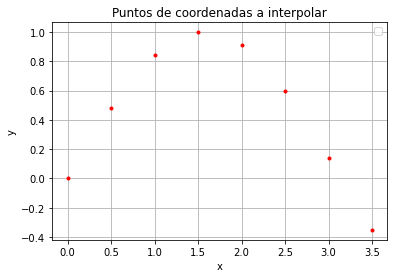

In [19]:
#Creamos un arreglo para las coordenadas 
coords = np.array([[0.0,0.0],[0.5,0.47942],[1.0,0.84147],[1.5,0.99749],[2.0,0.90930],[2.5,0.59847],[3.0,0.14112],[3.5,-0.35078]])
x = coords[:,0]
y = coords[:,1]
print(coords)

#Creamos la matriz de Vandermonde
X = np.vander(x, increasing=True)

#Revisamos la gráfica con los puntos
plt.plot(x,y,'r.')
plt.title('Puntos de coordenadas a interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

In [20]:
#Resolvemos Xa = y para obtener a
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


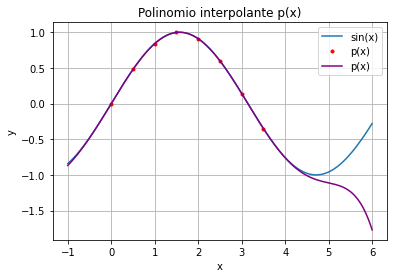

In [21]:
# Graficamos el polinomio interpolante y los puntos interpolados
xs = np.linspace(-1,6,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
ysin = np.sin(xs)
plt.plot(xs, ysin, label = 'sin(x)')
plt.plot(x,y,'r.',xs,ys, 'purple', label = 'p(x)')
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

**Ejercicio 6**

Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp ($T=a_0+a_lt$). Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_l$), es decir si las temperaturas están subiendo o bajando en el periodo analizado.

Temperatura Máxima

Fecha
2012-07-01    32.697808
2012-07-02    32.690685
2012-07-03    32.673151
2012-07-04    32.664932
2012-07-05    32.646301
                ...    
2017-06-28    33.136438
2017-06-29    33.150685
2017-06-30    33.162740
2017-07-01    33.166849
2017-07-02    33.179452
Name: Tmax, Length: 1826, dtype: float64


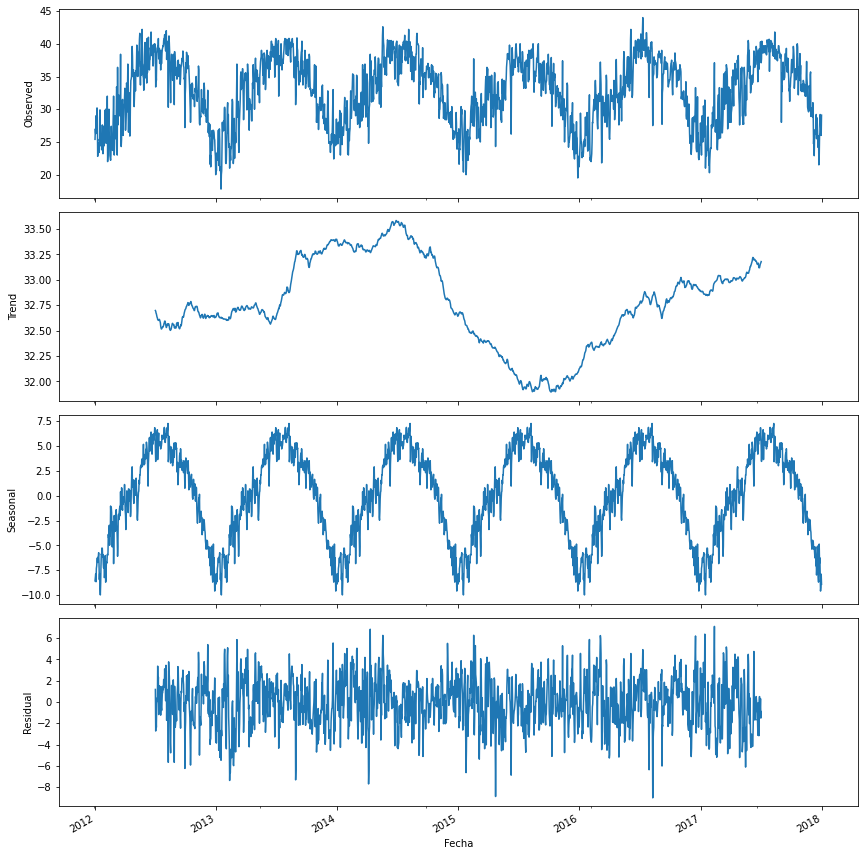

In [ ]:
#Descomponemos la serie de tiempo para la temperatura máxima del periodo 2012-01 a 2017-12
decompTmax = sm.tsa.seasonal_decompose(ts_Tmax.interpolate(), model='additive', freq=365)
decompTmax.plot()

#La función regresa 3 componentes: tendencia, estacionalidad y un residuo
trendTmax = decompTmax.trend
trendTmax = trendTmax[~np.isnan(trendTmax)]
print(trendTmax)

In [ ]:
N = 1826 #Número de datos
x = np.arange(0,N)
y = trendTmax
#Creamos la matriz X son unos en la primera columna y los puntos x_k en la segunda
X = np.column_stack([np.ones(N),x])
#Revisamos la forma de la matriz X
print('Shape: ', X.shape)
#Revisamos los primeros 5 renglones para verificar
print(X[:5,:])

Shape:  (1826, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
#Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 3.28769175e+01 -1.19481011e-04]


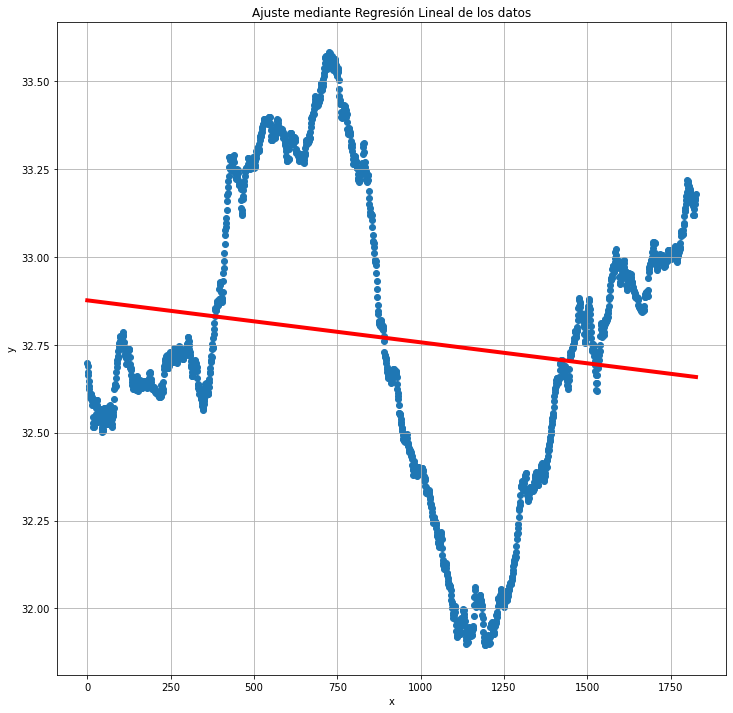

In [ ]:
#Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vemos que el coeficiente $a_l$ es negativo para la temperatura máxima.

*Temperatura Mínima*

Fecha
2012-07-01    18.460548
2012-07-02    18.468219
2012-07-03    18.486849
2012-07-04    18.489315
2012-07-05    18.496712
                ...    
2017-06-28    19.181644
2017-06-29    19.187123
2017-06-30    19.190959
2017-07-01    19.184384
2017-07-02    19.177534
Name: Tmin, Length: 1826, dtype: float64


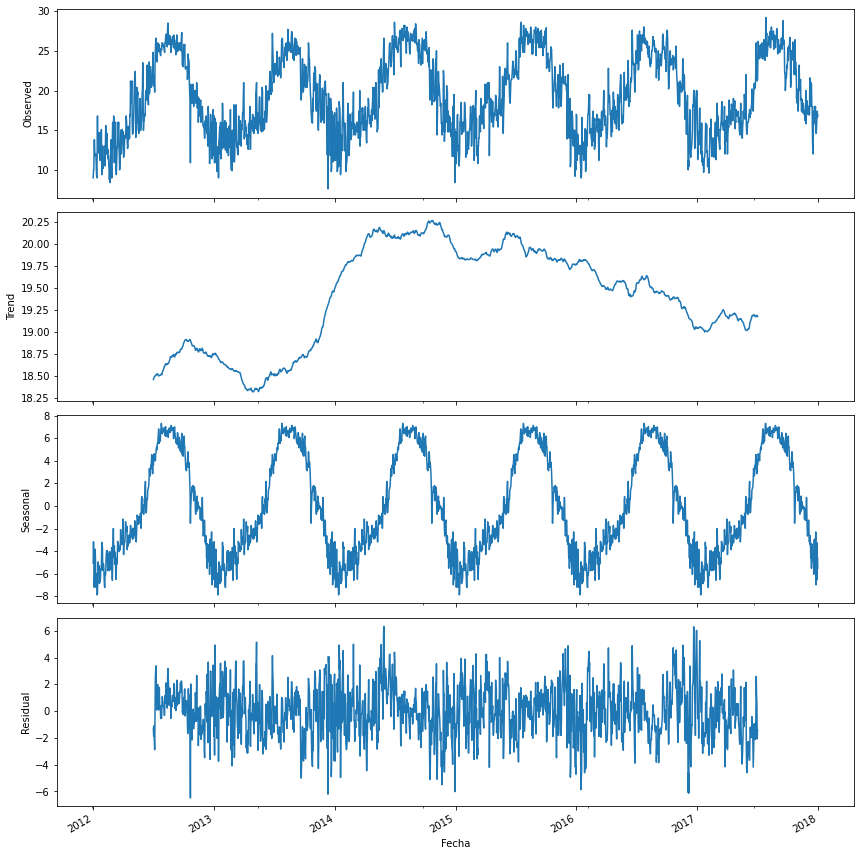

In [ ]:
#Descomponemos la serie de tiempo para la temperatura mínima del periodo 2012-01 a 2017-12
decompTmin = sm.tsa.seasonal_decompose(ts_Tmin.interpolate(), model='additive', freq=365)
decompTmin.plot()

#La función regresa 3 componentes: tendencia, estacionalidad y un residuo
trendTmin = decompTmin.trend
trendTmin = trendTmin[~np.isnan(trendTmin)]
print(trendTmin)

In [ ]:
N = 1826 #Número de datos
x = np.arange(0,N)
y = trendTmin
#Creamos la matriz X son unos en la primera columna y los puntos x_k en la segunda
X = np.column_stack([np.ones(N),x])
#Revisamos la forma de la matriz X
print('Shape: ', X.shape)
#Revisamos los primeros 5 renglones para verificar
print(X[:5,:])

Shape:  (1826, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
#Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[1.90013918e+01 4.41446016e-04]


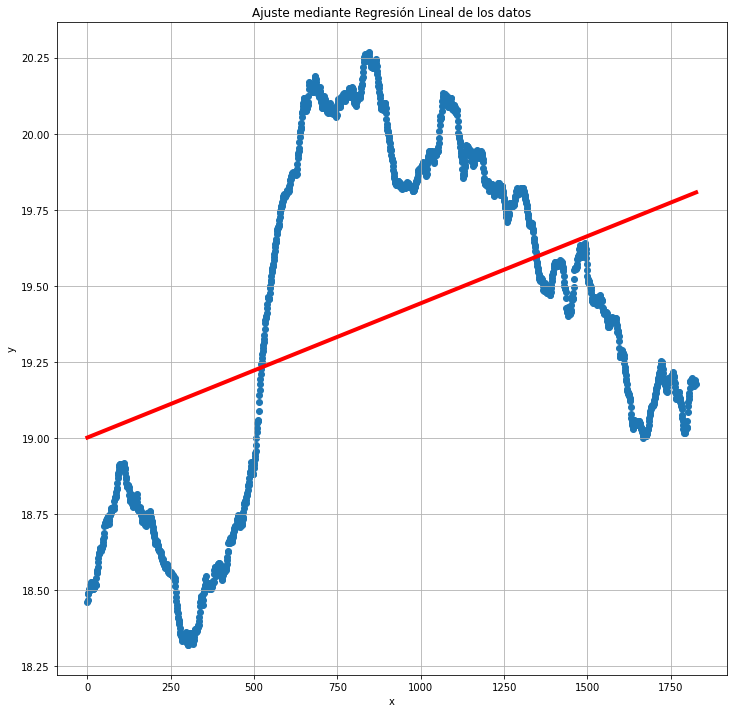

In [ ]:
#Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vemos que el coeficiente $a_l$ es positivo para la temperatura mínima.